## News Mood

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

In [8]:
# Dependencies
import tweepy
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key='O0lIqXHCu0YRQwN0gmHMsXQHy'
consumer_secret='Sf8cawo0rB8flAUI2oYHon0kLoaWnBnH1S6my3r5AIcMOzi7hn'
app_key='1008873804733374464-Eqc2CpyeFEpl7nV1EgTlH4lPPhKvj7'
app_secret='8MNfd21s8l7oC9Wvi2jIHRTJUgMZm4afLgbQ1yXCMK9AM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(app_key, app_secret)
api = tweepy.API(auth)

In [9]:
target_terms = ("@BBCWorld", "@CBSNews", "@cnnbrk", "@FoxNews", "@nytimes")


In [10]:
results_df = []

for target in target_terms:
    counter = 0
    temp_results = []
    for status in tweepy.Cursor(api.user_timeline, id=target).items(100):
        _status = status._json # dict
        _status['row_nbr'] = counter
        temp_results.append(_status)
        counter += 1
    
    df=pd.DataFrame([x for x in temp_results])[['text', 'created_at', 'row_nbr']]
    df['source account'] = target
    results_df.append(df)

all_data = pd.concat(results_df, axis=0)
all_data['polarity_scores'] = all_data['text'].map(lambda x: analyzer.polarity_scores(x))
all_data['pos'] = all_data.polarity_scores.map(lambda x: x.get('pos'))
all_data['neg'] = all_data.polarity_scores.map(lambda x: x.get('neg'))
all_data['neu'] = all_data.polarity_scores.map(lambda x: x.get('neu'))
all_data['compound'] = all_data.polarity_scores.map(lambda x: x.get('compound'))


all_data.head()

    

,text,created_at,row_nbr,source account,polarity_scores,pos,neg,neu,compound
0,Little hope ahead of polls in Mexico's Sinaloa...,Fri Jun 29 23:58:03 +0000 2018,0,@BBCWorld,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.225,0.000,0.775,0.3832
1,"Thai cave rescue: Drones, dogs, drilling and d...",Fri Jun 29 23:55:36 +0000 2018,1,@BBCWorld,"{'neg': 0.226, 'neu': 0.526, 'pos': 0.248, 'co...",0.248,0.226,0.526,0.0772
2,The young Austrian leader sharing power with t...,Fri Jun 29 23:50:03 +0000 2018,2,@BBCWorld,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.219,0.000,0.781,0.4215
3,"DR Congo: Oil drilling allowed in Virguna, Sal...",Fri Jun 29 23:47:37 +0000 2018,3,@BBCWorld,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,Doug Ford: Brother of notorious Rob Ford takes...,Fri Jun 29 21:51:12 +0000 2018,4,@BBCWorld,"{'neg': 0.419, 'neu': 0.581, 'pos': 0.0, 'comp...",0.000,0.419,0.581,-0.7579


In [66]:
all_data.to_csv('News Mood.csv')

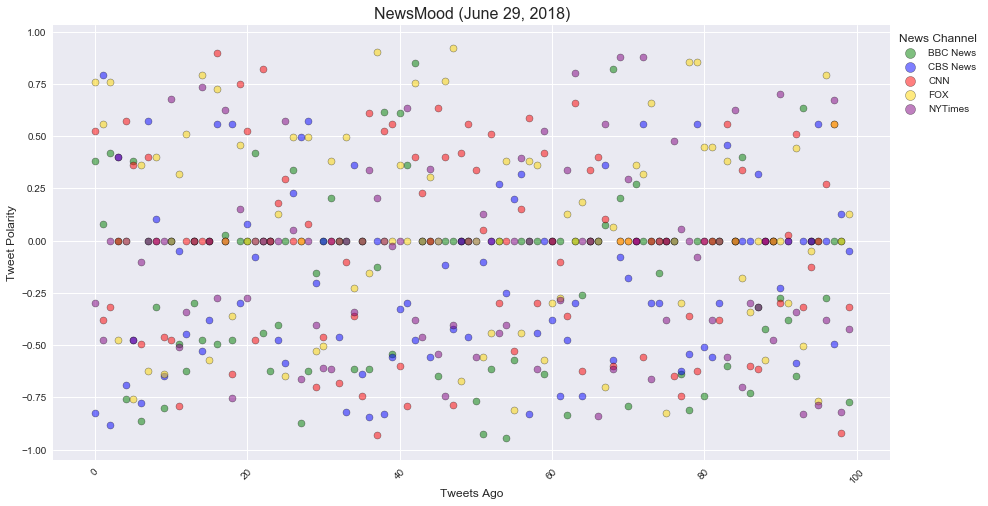

In [69]:
news_sort = all_data.groupby("source account")
BBC = news_sort.get_group('@BBCWorld')
BBC_created = BBC['row_nbr']
BBC_polarity = BBC['compound']

CBS = news_sort.get_group('@CBSNews')
CBS_created = CBS['row_nbr']
CBS_polarity = CBS['compound']

CNN = news_sort.get_group('@cnnbrk')
CNN_created = CNN['row_nbr']
CNN_polarity = CNN['compound']

Fox = news_sort.get_group('@FoxNews')
Fox_created = Fox['row_nbr']
Fox_polarity = Fox['compound']

nyt = news_sort.get_group('@nytimes')
nyt_created = nyt['row_nbr']
nyt_polarity = nyt['compound']



# Create scatter plot
sns.set()
plt.figure(figsize=(15,8))

BBC_plot = plt.scatter(BBC_created, BBC_polarity,  
            c = 'green', alpha = 0.5, edgecolor='black',linewidths=.5)
CBS_plot = plt.scatter(CBS_created, CBS_polarity,  
            c = 'blue', alpha = 0.5, edgecolor='black',linewidths=.5)
CNN_plot = plt.scatter(CNN_created, CNN_polarity,  
            c = 'red', alpha = 0.5, edgecolor='black',linewidths=.5)
Fox_plot = plt.scatter(Fox_created, Fox_polarity,  
            c = 'gold', alpha = 0.5, edgecolor='black',linewidths=.5)
nytimes_plot = plt.scatter(nyt_created, nyt_polarity,  
            c = 'purple', alpha = 0.5, edgecolor='black',linewidths=.5)
                         
# format graph
now = datetime.now()
now = now.strftime("%B %d, %Y")
plt.title(f"NewsMood ({now})", fontsize = 16)
plt.ylabel("Tweet Polarity", fontsize = 12)
plt.xlabel("Tweets Ago", fontsize=12)
plt.xticks(rotation=45)

# legend
lgnd = plt.legend(('BBC News','CBS News','CNN', 'FOX', 'NYTimes'), title = 'News Channel', bbox_to_anchor=(1.0, 1.0))
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
lgnd.legendHandles[3]._sizes = [100]
lgnd.legendHandles[4]._sizes = [100]

plt.savefig('news_mood.jpg')
plt.show()


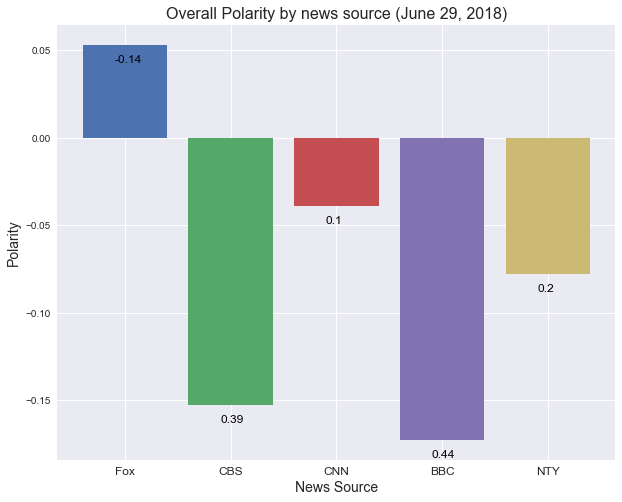

In [70]:
#creat bar chart of overall sentiment
fig, ax = plt.subplots(figsize=(10,8))

avg1 = ax.bar(0, Fox['compound'].mean(), label='Fox')
avg2 = ax.bar(1, CBS['compound'].mean(), label = 'CBS')
avg3 = ax.bar(2, CNN['compound'].mean(), label = 'CNN')
avg4 = ax.bar(3, BBC['compound'].mean(), label = 'BBC')
avg5 = ax.bar(4, nyt['compound'].mean(), label = 'NYT')

ax.set_xlabel('News Source', fontsize=14)
ax.set_ylabel('Polarity',fontsize=14)
# ax.set_ylim([-1, 1])
ax.set_title(f'Overall Polarity by news source ({now})', fontsize=16)
ax.set_xticklabels(['x','Fox', 'CBS', 'CNN', 'BBC', "NTY"], fontsize=12)

totals=[]
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.3, i.get_height()-.01, str(round((i.get_height()/total), 2)), fontsize = 12, color='black')

plt.savefig('overall_sentiment.jpg')
plt.show()


### observations
1. Sentiment varries on the day and time and current news. So no direct observation can be stated about whether tweetse are generally positive or negative overall.
2. All news sources polled seemed to be pretty varried with positive and negative tweets throught the day, so probably reporting on a variety of subjects
3. There are not too many tweets that are beyond the +/- 0.70 mark and a surprising number are completely neutral.